<a href="https://colab.research.google.com/github/ziqran-tech/Analis_python/blob/main/Analisis_Data_Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyek Analsis Data : Bike Sharing

Nama : Ziqran Khair Rifandy

Email : 21111058@ittelkom-pwt.ac.id


Iddicoding :

Menentukan Pertanyaan Bisnis

1. Bagaimana tren penggunaan sepeda berubah dari tahun 2011 ke 2012?
2. Bagaimana kondisi cuaca (misalnya, suhu, kelembaban, hujan) memengaruhi jumlah sepeda yang disewakan?
3. Apakah terdapat perbedaan signifikan dalam jumlah sepeda yang disewakan antara musim panas, musim gugur, musim dingin, dan musim semi?
4. Adakah perbedaan dalam pengyewaan sepeda antara hari kerja dan akhir pekan?

## Menyiapkan Semua Library yang Dibutuhkan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

## Data Wrangling

###Data Gathering

In [2]:
url = 'https://raw.githubusercontent.com/ziqran-tech/Analis_python/main/data/day.csv'

day_df = pd.read_csv(url)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
url = 'https://raw.githubusercontent.com/ziqran-tech/Analis_python/main/data/hour.csv'

hour_df = pd.read_csv(url)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


###Data Assesing

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah Duplikasi Data : ", day_df.duplicated().sum())

Jumlah Duplikasi Data :  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah Duplikasi Data : ", hour_df.duplicated().sum())

Jumlah Duplikasi Data :  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Cleaning Data

In [12]:
datetime_column = ["dteday"]

for column in datetime_column :
  day_df[column] = pd.to_datetime(day_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
datetime_column = ["dteday"]

for column in datetime_column :
  hour_df[column] = pd.to_datetime(hour_df[column])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

# Exploratory Data Analysis (EDA)

## Total Jumlah Penyewaan Sepeda Pada 2011-2012

In [16]:
year = {0:2011, 1:2012 }
day_df['yr'] = day_df['yr'].map(year)


day_df.groupby(by=['yr']).agg({
    "instant": "nunique",
    "cnt": 'sum'
})

,instant,cnt
yr,,
2011,365,1243103
2012,366,2049576


## Melihat Perbandingan Penyewaan Sepeda Pada Tiap Musimnya

In [17]:
season_mapping = {1: 'Clear', 2: 'Misty', 3: 'Rainy', 4:'Heavy Rain'}
day_df['weathersit'] = day_df['weathersit'].map(season_mapping)

day_df.groupby('weathersit').instant.nunique().sort_values(ascending=False)

weathersit
Clear    463
Misty    247
Rainy     21
Name: instant, dtype: int64

In [18]:
day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
Clear    451
Misty    243
Rainy     21
Name: cnt, dtype: int64

## Melihat Nilai Aggregasi dari Penyewaan Sepeda Pada Tiap Jenis Cuaca

In [19]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["sum","max", "min", "mean", "std"]
})

instant      cnt                                     
           nunique      sum   max  min         mean          std
weathersit                                                      
Clear          463  2257952  8714  431  4876.786177  1879.483989
Misty          247   996858  8362  605  4035.862348  1809.109918
Rainy           21    37869  4639   22  1803.285714  1240.284449

In [20]:
season_name = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
day_df['season'] = day_df['season'].map(season_name)

day_df.groupby('season').instant.count()

season
Fall      188
Spring    181
Summer    184
Winter    178
Name: instant, dtype: int64

##Data Jumlah Penyewaan Sepeda Paling Banyak

In [21]:
day_df[day_df.cnt == day_df.cnt.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,Fall,2012,9,0,6,0,Clear,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


## Data Jumlah Penyewaan Sepeda Paling Sedikit

In [22]:
day_df[day_df.cnt == day_df.cnt.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,Winter,2012,10,0,1,1,Rainy,0.44,0.4394,0.88,0.3582,2,20,22


## Perbandingan Total Penyewaan Sepeda Pada Tiap Musimnya

In [23]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["sum","max", "min", "mean", "std"]
})

instant      cnt                                      
       nunique      sum   max   min         mean          std
season                                                       
Fall       188  1061129  8714  1115  5644.303191  1459.800381
Spring     181   471348  7836   431  2604.132597  1399.942119
Summer     184   918589  8362   795  4992.331522  1695.977235
Winter     178   841613  8555    22  4728.162921  1699.615261

## Total Penyewaan Sepeda Pada Working Day dan Hari Lainnya

In [24]:
workingday_mapping = {1:'Holliday', 0:'Workingday'}
day_df['workingday'] = day_df['workingday'].map(workingday_mapping)

day_df.groupby('workingday').cnt.sum()

workingday
Holliday      2292410
Workingday    1000269
Name: cnt, dtype: int64

## Jumlah Penyewaan Sepeda Pada Working Day dan Hari lainnya

In [25]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["sum","max", "min", "mean", "std"]
})

instant      cnt                                     
           nunique      sum   max  min         mean          std
workingday                                                      
Holliday       500  2292410  8362   22  4584.820000  1878.415583
Workingday     231  1000269  8714  605  4330.168831  2052.141245

## Menghitung Jumlah Penyewaan Sepeda Berdasarkan Tipe hari pada Tahun 2011 dan 2012

In [26]:
day_df.groupby(by=['yr','workingday']).agg({
    "cnt" : "sum"
})

cnt
yr   workingday         
2011 Holliday     856264
     Workingday   386839
2012 Holliday    1436146
     Workingday   613430

# Data Visualization

In [27]:
month_df = day_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})
month_df.index = month_df.index.strftime('%B')

month_df.rename(columns={
    'instant' : 'Count Of Day',
    'cnt' : 'Rental Amount',
}, inplace = True)

month_df.head()


,Count Of Day,Rental Amount
dteday,,
January,31,38189
February,28,48215
March,31,64045
April,30,94870
May,31,135821


In [28]:
day_df.rename(columns ={
    'yr' : 'Year',
    'dteday' : 'Date Time',
}, inplace=True)

day_df.groupby(by = ['Year']).agg({
    'cnt' : 'sum'
})


,cnt
Year,
2011,1243103
2012,2049576


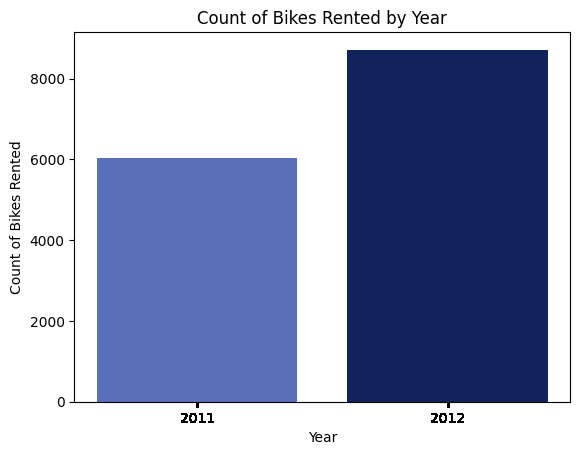

In [37]:
most_common_category = day_df['Year'].value_counts().idxmax()
color_palette = ['#11235A' if cat == most_common_category else '#596FB7' for cat in day_df['Year']]

plt.bar(day_df['Year'], day_df['cnt'], color=color_palette)
plt.xlabel('Year')
plt.ylabel('Count of Bikes Rented')
plt.xticks(day_df['Year'])

plt.title('Count of Bikes Rented by Year')
plt.show()

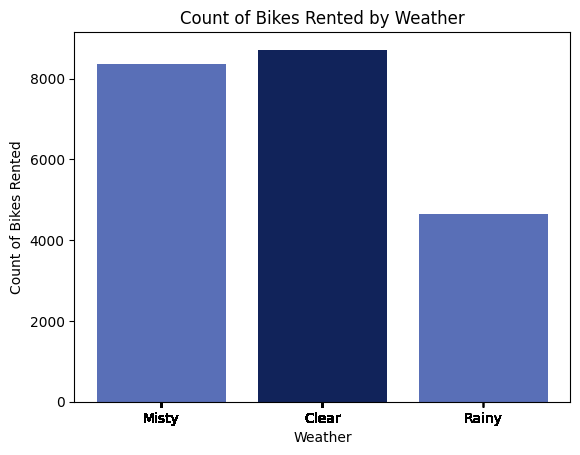

In [40]:
most_common_category = day_df['weathersit'].value_counts().idxmax()
color_palette = ['#11235A' if cat == most_common_category else '#596FB7' for cat in day_df['weathersit']]

plt.bar(day_df['weathersit'], day_df['cnt'], color = color_palette)
plt.xlabel('Weather')
plt.ylabel('Count of Bikes Rented')
plt.xticks(day_df['weathersit'])

plt.title('Count of Bikes Rented by Weather')
plt.show()

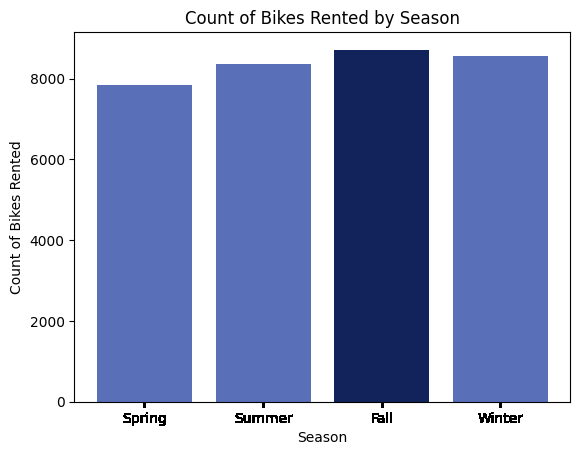

In [41]:
most_common_category = day_df['season'].value_counts().idxmax()
color_palette = ['#11235A' if cat == most_common_category else '#596FB7' for cat in day_df['season']]


plt.bar(day_df['season'], day_df['cnt'], color = color_palette)
plt.xlabel('Season')
plt.ylabel('Count of Bikes Rented')
plt.xticks(day_df['season'])

plt.title('Count of Bikes Rented by Season')
plt.show()

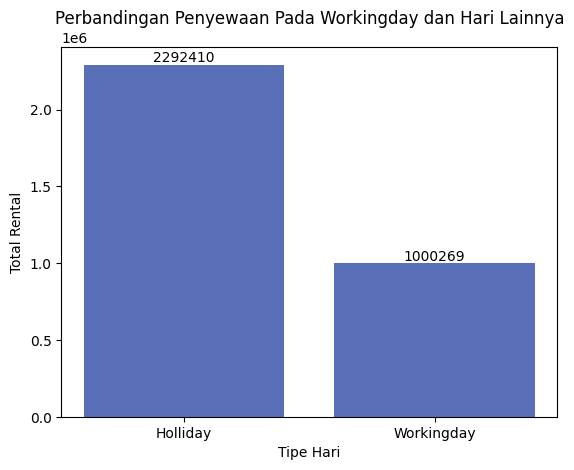

In [42]:
most_common_category = day_df['workingday'].value_counts().idxmax()
color_palette = ['#11235A' if cat == most_common_category else '#596FB7' for cat in day_df['workingday']]

total_rentals_by_day = day_df.groupby('workingday')['cnt'].sum()
plt.bar(total_rentals_by_day.index, total_rentals_by_day.values, color= color_palette)

plt.xlabel('Tipe Hari')
plt.ylabel('Total Rental')
plt.title('Perbandingan Penyewaan Pada Workingday dan Hari Lainnya')

for i, value in enumerate(total_rentals_by_day.values):
    plt.text(i, value, round(value, 2), ha='center', va='bottom')

plt.show()

##Conclusion

1. Trend Jumlah Penyewaan Sepeda Meningkat dari tahun 2011 ke tahun 2012.
2. Mayoritas penyewa sepeda melakukan penyewaan pada saat cuaca cerah.
3. Hari libur adalah hari dimana mayoritas orang melakukan penyewaan sepeda.
4. Musim dengan transaksi penyewaan sepeda terbanyak adalah pada saat musim gugur atau fall

In [43]:
day_df.to_csv("day.csv", index=False)

In [44]:
hour_df.to_csv("hour.csv", index=False)